In [ ]:
lr = 2e-5 
epoch = int(2e3) 
batch_size = 100
layer_widths = [784, 600, 500, 400, 300, 200, 100, 50, 10, 2]

In [ ]:
import numpy as np; np.random.seed(0)
import tensorflow.compat.v1 as tf; tf.disable_v2_behavior() 

In [1]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0
x_train, x_test = x_train.reshape((-1, 784)), x_test.reshape((-1, 784))
x_train, x_test = x_train.astype(np.float32), x_test.astype(np.float32) 

(60000, 784) float32
(10000, 784) float32


In [2]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, (None, 784)) # (?, 784)

init_w = tf.keras.initializers.VarianceScaling(seed=0)
init_b = tf.keras.initializers.zeros()

w_shapes = []
previous = layer_widths[0] 
for layer_width in layer_widths[1:]:
    w_shapes.append((previous, layer_width))
    previous = layer_width 

for i, (pre, layer_width) in enumerate(w_shapes):
    w_name = f'w{i}_encoder'
    b_name = f'b{i}_encoder'
    w = tf.get_variable(w_name, (pre, layer_width), tf.float32, init_w)
    b = tf.get_variable(b_name, (layer_width,), tf.float32, init_b)
    if i==0:
        x1 = tf.nn.selu(x @ w + b)
    elif i!=len(w_shapes)-1:
        x1 = tf.nn.selu(x1 @ w + b)
    else:
        hidden = tf.nn.sigmoid(x1 @ w + b)
        
for i, (pre, layer_width) in enumerate(w_shapes[::-1]):
    w_name = f'w{len(w_shapes)-1-i}_encoder'
    b_name = f'b{len(w_shapes)-1-i}_decoder'
    w = tf.get_default_graph().get_tensor_by_name(f'{w_name}:0')
    b = tf.get_variable(b_name, (pre,), tf.float32, init_b)
    if i==0:
        x1 = tf.nn.selu(hidden @ tf.transpose(w) + b)
    elif i!=len(w_shapes)-1:
        x1 = tf.nn.selu(x1 @ tf.transpose(w) + b)
    else:
        x_recon = tf.nn.sigmoid(x1 @ tf.transpose(w) + b)

loss = tf.keras.losses.binary_crossentropy(x, x_recon)

opt = tf.train.AdamOptimizer(lr)
train = opt.minimize(loss)

init = tf.global_variables_initializer()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
with tf.Session() as sess:
    
    sess.run(init)
    
    loss_trace = []

    for i in range(epoch):
        
        idx = np.arange(x_train.shape[0])
        np.random.shuffle(idx)
        
        x_epoch = x_train[idx]
        
        for k in range(x_train.shape[0]//batch_size):
            
            if k==0:
                loss_temp = []
                
            x_batch = x_epoch[k*batch_size:(k+1)*batch_size]
            
            feed_dict = {x : x_batch}
            
            loss_run, _ = sess.run([loss, train], feed_dict=feed_dict)
            
            loss_temp.append(loss_run) 
        
        loss_avg = np.array(loss_temp).mean()
        loss_trace.append(loss_avg)
        print(f'{i+1}/{epoch} loss {loss_avg}')
    
    feed_dict = {x : x_test}
    x_test_recon, x_test_hidden = sess.run([x_recon, hidden], 
                                           feed_dict=feed_dict)
    
    x_grid = np.linspace(0.01, 0.99, 20)
    y_grid = np.linspace(0.01, 0.99, 20)
    X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
    X_grid, Y_grid = X_grid.reshape((-1,1)), Y_grid.reshape((-1,1))
    hidden_grid = np.concatenate([X_grid, Y_grid], axis=1)
    
    feed_dict = {hidden : hidden_grid}
    latent_space_walk = sess.run(x_recon, feed_dict=feed_dict)

1/2000 loss 0.31171029806137085
2/2000 loss 0.24049049615859985
3/2000 loss 0.23311717808246613
4/2000 loss 0.22745224833488464
5/2000 loss 0.2228482961654663
6/2000 loss 0.21958069503307343
7/2000 loss 0.21713629364967346
8/2000 loss 0.21503978967666626
9/2000 loss 0.21290063858032227
10/2000 loss 0.21080021560192108
11/2000 loss 0.20891155302524567
12/2000 loss 0.2073528915643692
13/2000 loss 0.20598921179771423
14/2000 loss 0.2048315405845642
15/2000 loss 0.20372746884822845
16/2000 loss 0.20272225141525269
17/2000 loss 0.20162498950958252
18/2000 loss 0.2005985975265503
19/2000 loss 0.19958649575710297
20/2000 loss 0.19877904653549194
21/2000 loss 0.19802479445934296
22/2000 loss 0.19727976620197296
23/2000 loss 0.19674602150917053
24/2000 loss 0.19611024856567383
25/2000 loss 0.19560502469539642
26/2000 loss 0.19509495794773102
27/2000 loss 0.19461429119110107
28/2000 loss 0.1942678689956665
29/2000 loss 0.19382420182228088
30/2000 loss 0.19331815838813782
31/2000 loss 0.192928776

248/2000 loss 0.1671396791934967
249/2000 loss 0.1670992374420166
250/2000 loss 0.16711653769016266
251/2000 loss 0.16707585752010345
252/2000 loss 0.16705673933029175
253/2000 loss 0.16697120666503906
254/2000 loss 0.16693736612796783
255/2000 loss 0.1669461876153946
256/2000 loss 0.1668834090232849
257/2000 loss 0.166858971118927
258/2000 loss 0.16686201095581055
259/2000 loss 0.16679050028324127
260/2000 loss 0.16683585941791534
261/2000 loss 0.166715607047081
262/2000 loss 0.1667734682559967
263/2000 loss 0.16668379306793213
264/2000 loss 0.16658999025821686
265/2000 loss 0.16660135984420776
266/2000 loss 0.16660957038402557
267/2000 loss 0.1665719598531723
268/2000 loss 0.1665891408920288
269/2000 loss 0.16648130118846893
270/2000 loss 0.16648763418197632
271/2000 loss 0.16641944646835327
272/2000 loss 0.16641610860824585
273/2000 loss 0.16632239520549774
274/2000 loss 0.166343554854393
275/2000 loss 0.16629615426063538
276/2000 loss 0.1663374900817871
277/2000 loss 0.166290402412

492/2000 loss 0.16210374236106873
493/2000 loss 0.1621161848306656
494/2000 loss 0.1621330827474594
495/2000 loss 0.16205953061580658
496/2000 loss 0.16212697327136993
497/2000 loss 0.16205035150051117
498/2000 loss 0.16198979318141937
499/2000 loss 0.16208072006702423
500/2000 loss 0.16200196743011475
501/2000 loss 0.1620384007692337
502/2000 loss 0.16198161244392395
503/2000 loss 0.16199006140232086
504/2000 loss 0.162002831697464
505/2000 loss 0.16195964813232422
506/2000 loss 0.1619078665971756
507/2000 loss 0.16192220151424408
508/2000 loss 0.16190336644649506
509/2000 loss 0.16189400851726532
510/2000 loss 0.16188682615756989
511/2000 loss 0.16184209287166595
512/2000 loss 0.16183897852897644
513/2000 loss 0.16192182898521423
514/2000 loss 0.1618354469537735
515/2000 loss 0.16184194386005402
516/2000 loss 0.16178208589553833
517/2000 loss 0.1617971807718277
518/2000 loss 0.16178175806999207
519/2000 loss 0.161676287651062
520/2000 loss 0.16177649796009064
521/2000 loss 0.16170541

736/2000 loss 0.1593712717294693
737/2000 loss 0.1592942476272583
738/2000 loss 0.15929552912712097
739/2000 loss 0.15924055874347687
740/2000 loss 0.15925191342830658
741/2000 loss 0.1592058688402176
742/2000 loss 0.15929089486598969
743/2000 loss 0.15926887094974518
744/2000 loss 0.15919151902198792
745/2000 loss 0.15918278694152832
746/2000 loss 0.15920664370059967
747/2000 loss 0.159192755818367
748/2000 loss 0.15920187532901764
749/2000 loss 0.1591833382844925
750/2000 loss 0.15918533504009247
751/2000 loss 0.1591750979423523
752/2000 loss 0.15915346145629883
753/2000 loss 0.15909385681152344
754/2000 loss 0.159187451004982
755/2000 loss 0.1592160016298294
756/2000 loss 0.15905320644378662
757/2000 loss 0.15899214148521423
758/2000 loss 0.15909887850284576
759/2000 loss 0.15906815230846405
760/2000 loss 0.15896376967430115
761/2000 loss 0.15907521545886993
762/2000 loss 0.1590399295091629
763/2000 loss 0.1591133028268814
764/2000 loss 0.15898655354976654
765/2000 loss 0.1590079516

980/2000 loss 0.1572183519601822
981/2000 loss 0.15728051960468292
982/2000 loss 0.15726463496685028
983/2000 loss 0.1571829915046692
984/2000 loss 0.1572888195514679
985/2000 loss 0.15728993713855743
986/2000 loss 0.15719939768314362
987/2000 loss 0.1571878343820572
988/2000 loss 0.15724262595176697
989/2000 loss 0.15716902911663055
990/2000 loss 0.15718603134155273
991/2000 loss 0.15721845626831055
992/2000 loss 0.15716390311717987
993/2000 loss 0.1571706384420395
994/2000 loss 0.157186359167099
995/2000 loss 0.15714417397975922
996/2000 loss 0.1570863127708435
997/2000 loss 0.1571226418018341
998/2000 loss 0.15712077915668488
999/2000 loss 0.15710900723934174
1000/2000 loss 0.15714600682258606
1001/2000 loss 0.1571069210767746
1002/2000 loss 0.15714123845100403
1003/2000 loss 0.15707850456237793
1004/2000 loss 0.15698671340942383
1005/2000 loss 0.1570843905210495
1006/2000 loss 0.1570473462343216
1007/2000 loss 0.15707837045192719
1008/2000 loss 0.15699180960655212
1009/2000 loss 0.

1217/2000 loss 0.1557081639766693
1218/2000 loss 0.1558031439781189
1219/2000 loss 0.15562117099761963
1220/2000 loss 0.15566624701023102
1221/2000 loss 0.15570932626724243
1222/2000 loss 0.15574193000793457
1223/2000 loss 0.15563835203647614
1224/2000 loss 0.15562331676483154
1225/2000 loss 0.1556621938943863
1226/2000 loss 0.155673086643219
1227/2000 loss 0.15568234026432037
1228/2000 loss 0.15556131303310394
1229/2000 loss 0.15571314096450806
1230/2000 loss 0.15559379756450653
1231/2000 loss 0.1556515395641327
1232/2000 loss 0.15558969974517822
1233/2000 loss 0.1556045264005661
1234/2000 loss 0.1556079089641571
1235/2000 loss 0.15558281540870667
1236/2000 loss 0.15560676157474518
1237/2000 loss 0.15560853481292725
1238/2000 loss 0.15558740496635437
1239/2000 loss 0.15553763508796692
1240/2000 loss 0.15558284521102905
1241/2000 loss 0.15555094182491302
1242/2000 loss 0.15558075904846191
1243/2000 loss 0.1555318832397461
1244/2000 loss 0.1556033045053482
1245/2000 loss 0.1555550247430

1454/2000 loss 0.15441982448101044
1455/2000 loss 0.15441930294036865
1456/2000 loss 0.15441234409809113
1457/2000 loss 0.15445683896541595
1458/2000 loss 0.1544007509946823
1459/2000 loss 0.15440581738948822
1460/2000 loss 0.154350146651268
1461/2000 loss 0.1544325053691864
1462/2000 loss 0.1543964147567749
1463/2000 loss 0.1544165313243866
1464/2000 loss 0.15433178842067719
1465/2000 loss 0.1543959677219391
1466/2000 loss 0.15435509383678436
1467/2000 loss 0.15433640778064728
1468/2000 loss 0.15436433255672455
1469/2000 loss 0.15436729788780212
1470/2000 loss 0.1543443202972412
1471/2000 loss 0.15434493124485016
1472/2000 loss 0.15438418090343475
1473/2000 loss 0.15437273681163788
1474/2000 loss 0.1543331742286682
1475/2000 loss 0.15434828400611877
1476/2000 loss 0.15434473752975464
1477/2000 loss 0.15429958701133728
1478/2000 loss 0.15435820817947388
1479/2000 loss 0.15428997576236725
1480/2000 loss 0.15425875782966614
1481/2000 loss 0.15427564084529877
1482/2000 loss 0.154325455427

1691/2000 loss 0.153342604637146
1692/2000 loss 0.1533527970314026
1693/2000 loss 0.15336506068706512
1694/2000 loss 0.15326490998268127
1695/2000 loss 0.15332669019699097
1696/2000 loss 0.1532142609357834
1697/2000 loss 0.1533527970314026
1698/2000 loss 0.1532585471868515
1699/2000 loss 0.15326263010501862
1700/2000 loss 0.15338075160980225
1701/2000 loss 0.15331816673278809
1702/2000 loss 0.15332815051078796
1703/2000 loss 0.15321265161037445
1704/2000 loss 0.15323081612586975
1705/2000 loss 0.15329021215438843
1706/2000 loss 0.15329866111278534
1707/2000 loss 0.15327274799346924
1708/2000 loss 0.15323157608509064
1709/2000 loss 0.15327773988246918
1710/2000 loss 0.1533256322145462
1711/2000 loss 0.15315596759319305
1712/2000 loss 0.15320473909378052
1713/2000 loss 0.15328294038772583
1714/2000 loss 0.1532094031572342
1715/2000 loss 0.15318730473518372
1716/2000 loss 0.15322840213775635
1717/2000 loss 0.15319934487342834
1718/2000 loss 0.1532098650932312
1719/2000 loss 0.153250470757

1928/2000 loss 0.15234576165676117
1929/2000 loss 0.15236453711986542
1930/2000 loss 0.15232528746128082
1931/2000 loss 0.15235009789466858
1932/2000 loss 0.15241658687591553
1933/2000 loss 0.15225540101528168
1934/2000 loss 0.15234215557575226
1935/2000 loss 0.1523141711950302
1936/2000 loss 0.1523224413394928
1937/2000 loss 0.15226209163665771
1938/2000 loss 0.15231139957904816
1939/2000 loss 0.15229719877243042
1940/2000 loss 0.1522812396287918
1941/2000 loss 0.1523236334323883
1942/2000 loss 0.152316614985466
1943/2000 loss 0.1522207260131836
1944/2000 loss 0.15225672721862793
1945/2000 loss 0.1522456705570221
1946/2000 loss 0.15224413573741913
1947/2000 loss 0.15226151049137115
1948/2000 loss 0.15230505168437958
1949/2000 loss 0.15229050815105438
1950/2000 loss 0.1522940695285797
1951/2000 loss 0.1522321254014969
1952/2000 loss 0.15226788818836212
1953/2000 loss 0.152248814702034
1954/2000 loss 0.15218821167945862
1955/2000 loss 0.15221598744392395
1956/2000 loss 0.152207866311073

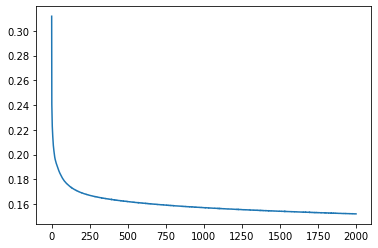

In [4]:
import matplotlib.pyplot as plt
plt.plot(loss_trace)
plt.show()

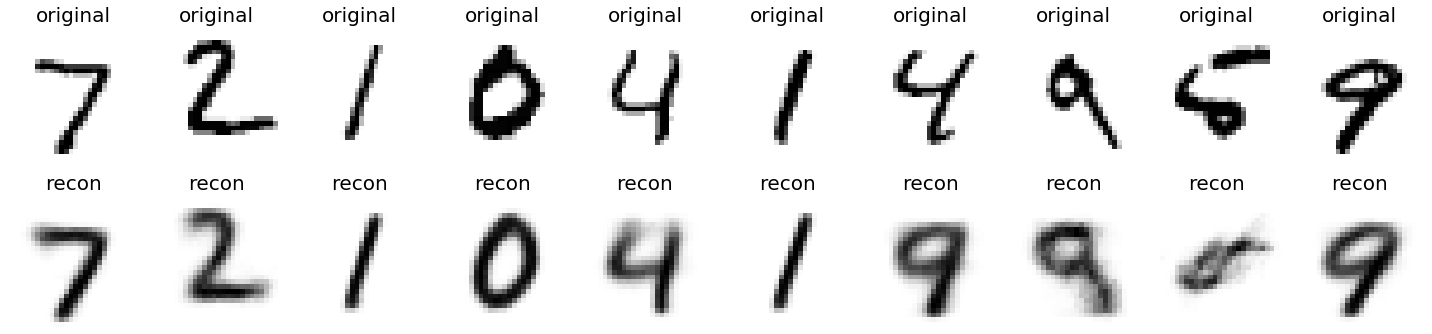

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(20,5))

for i in range(2):
    for j in range(10):
        
        if i==0:
            img = x_test[j].reshape((28,28))
            title = 'original'
        else:
            img = x_test_recon[j].reshape((28,28))
            title = 'recon'
            
        axes[i, j].imshow(img, cmap='binary')
        axes[i, j].set_title(title, fontsize=20)
        axes[i, j].axis('off')
            
plt.tight_layout()

plt.show()

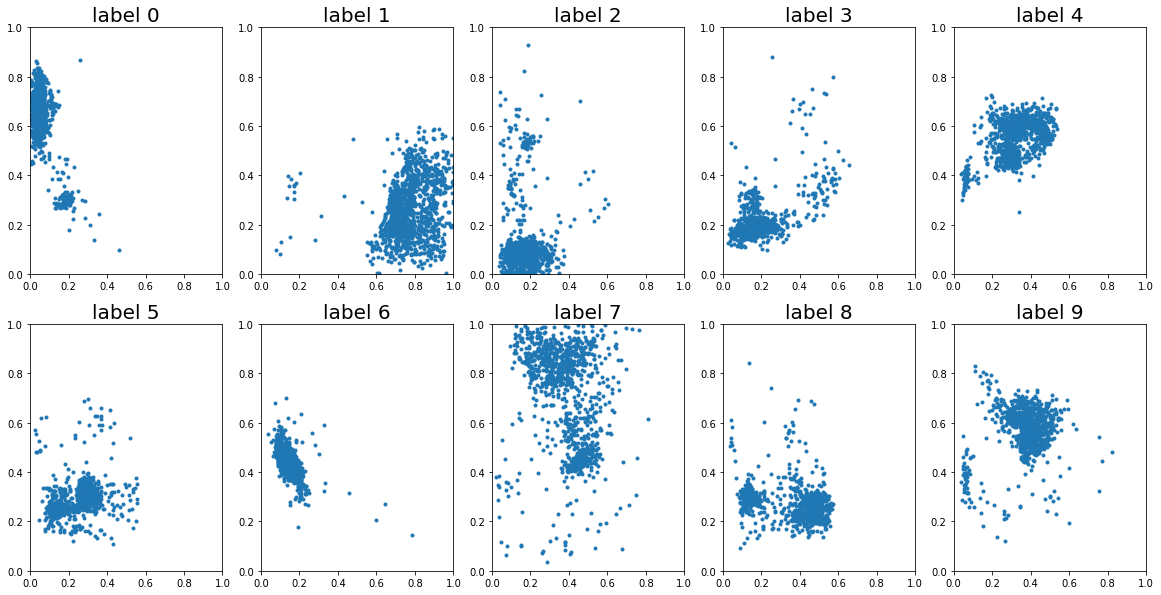

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,10))

for i in range(2):
    for j in range(5):
        
        k = i*5 + j
    
        x_fig = x_test_hidden[y_test==k][:,0]
        y_fig = x_test_hidden[y_test==k][:,1]
        axes[i, j].plot(x_fig, y_fig, '.')
        axes[i, j].set_title(f'label {k}', fontsize=20)
        axes[i, j].set_xlim([0., 1.])
        axes[i, j].set_ylim([0., 1.])
            
plt.show()

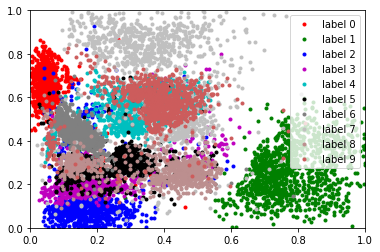

In [7]:
import matplotlib.pyplot as plt

colors = ['r','g','b','m','c','k','gray','silver','rosybrown','indianred']
for i in range(2):
    for j in range(5):
        
        k = i*5 + j
    
        x_fig = x_test_hidden[y_test==k][:,0]
        y_fig = x_test_hidden[y_test==k][:,1]
        plt.plot(x_fig, y_fig, '.', color=colors[k], label=f'label {k}')
        
plt.legend()
plt.xlim([0., 1.])
plt.ylim([0., 1.])
            
plt.show()

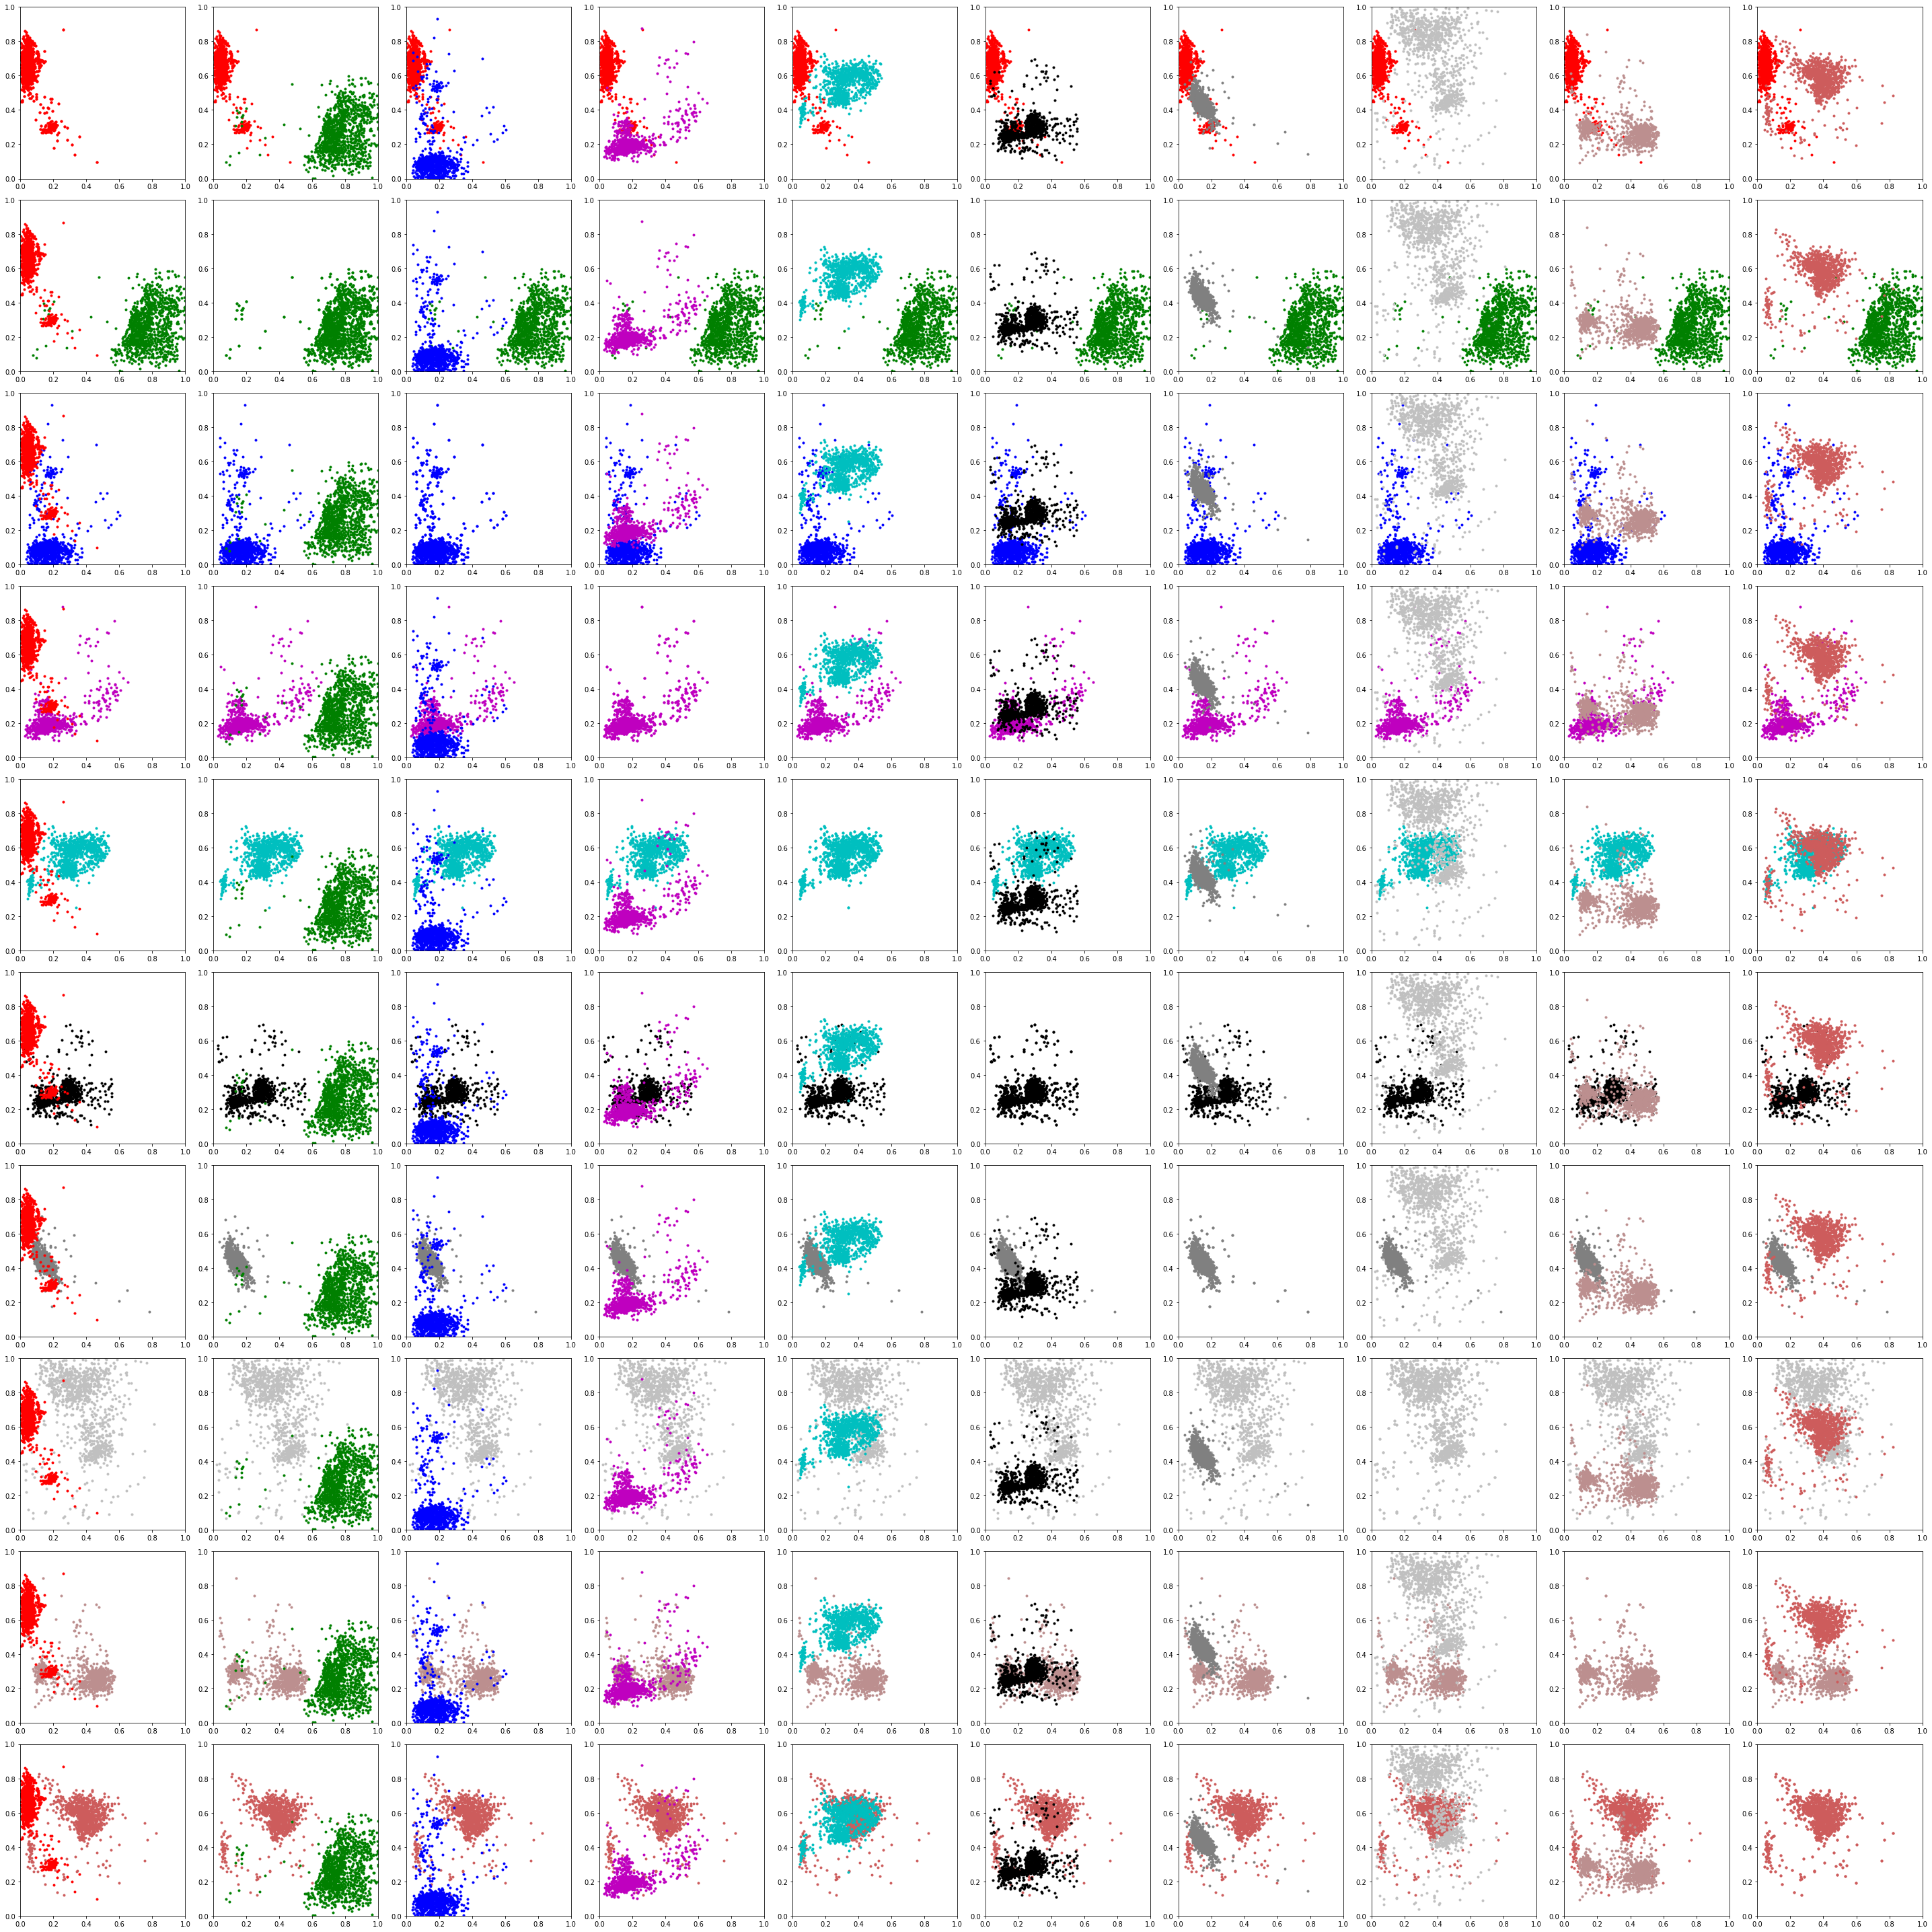

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(40,40))

colors = ['r','g','b','m','c','k','gray','silver','rosybrown','indianred']
for i in range(10):
    for j in range(10):
    
        x_fig = x_test_hidden[y_test==i][:,0]
        y_fig = x_test_hidden[y_test==i][:,1]
        axes[i, j].plot(x_fig, y_fig, '.', color=colors[i])
        
        x_fig = x_test_hidden[y_test==j][:,0]
        y_fig = x_test_hidden[y_test==j][:,1]
        axes[i, j].plot(x_fig, y_fig, '.', color=colors[j])

        axes[i, j].set_xlim([0., 1.])
        axes[i, j].set_ylim([0., 1.])

plt.tight_layout()
plt.show()

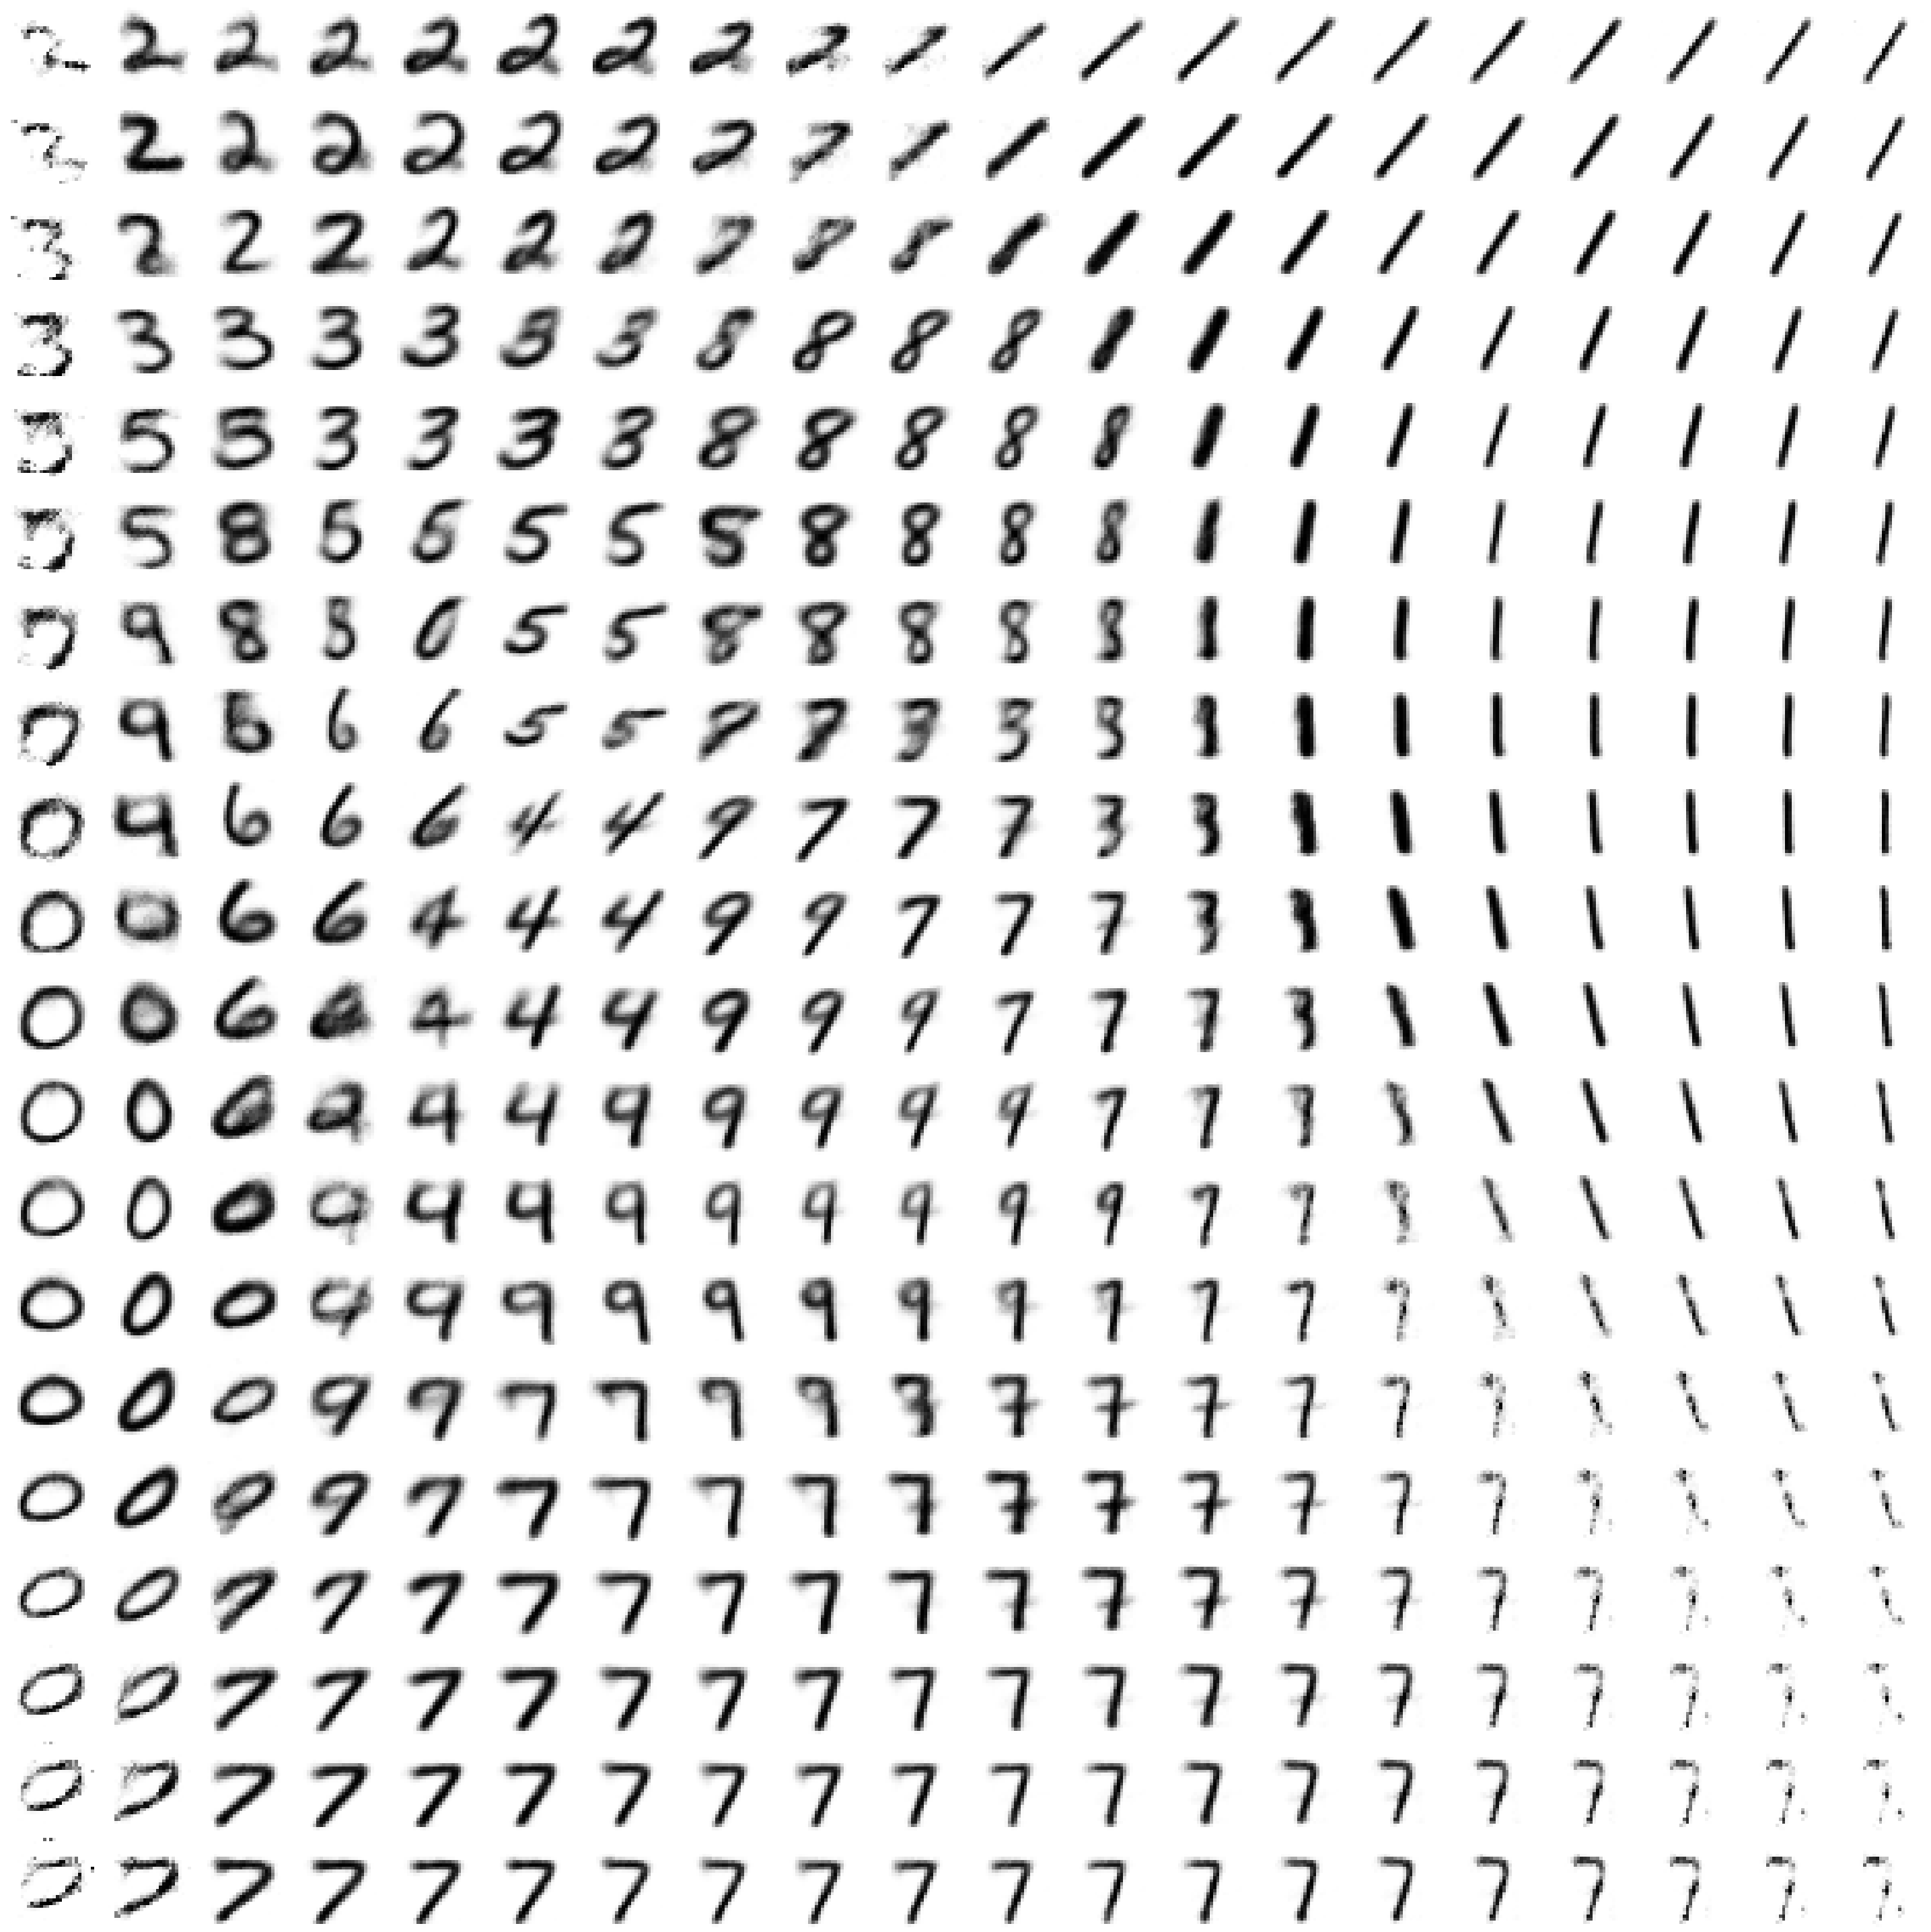

In [9]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=20, ncols=20, figsize=(40,40))

for i in range(20):
    for j in range(20):
        
        img = latent_space_walk[i*20+j].reshape((28,28))
            
        axes[i, j].imshow(img, cmap='binary')
        axes[i, j].axis('off')
            
plt.tight_layout()

plt.show()